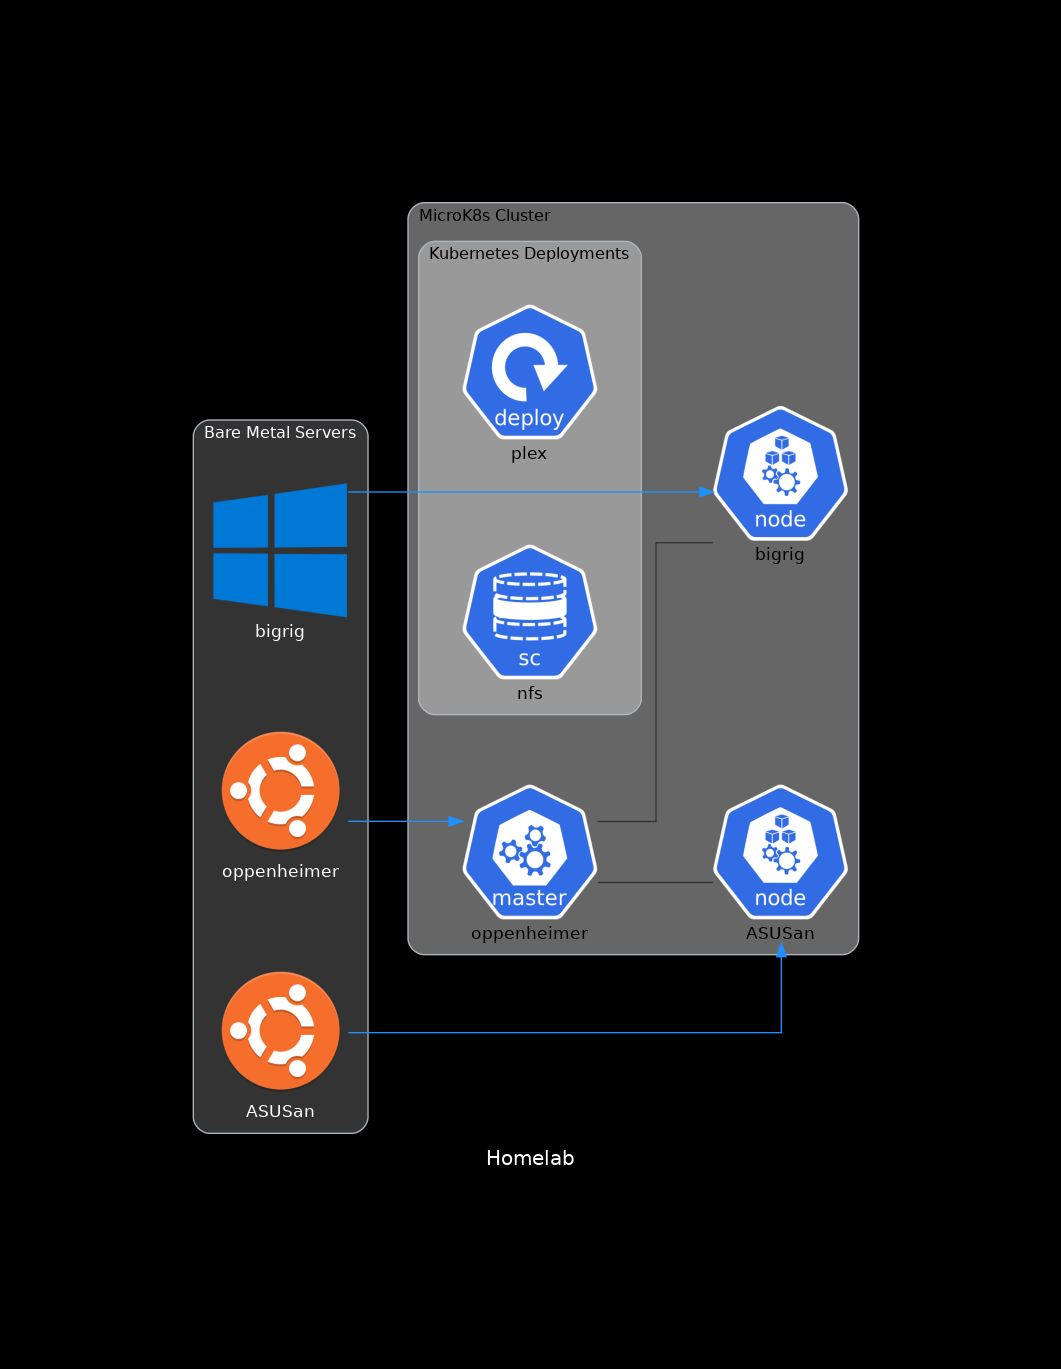

In [1]:
from diagrams               import Diagram, Cluster, Edge
from diagrams.generic.os    import Ubuntu, Windows
from diagrams.k8s.infra     import Master, Node
from diagrams.k8s.compute   import Deployment
from diagrams.k8s.storage   import StorageClass

diagram_attr = { "fontcolor": "white", "bgcolor": "black" }
with Diagram("Homelab", graph_attr=diagram_attr) as diag:
    baremetal_cluster_attr = { "fontcolor": "white", "bgcolor": "gray20" }
    with Cluster("Bare Metal Servers", graph_attr=baremetal_cluster_attr) as baremetal_cluster:
        server_attr = { "fontcolor": "white" }
        bigrig      = Windows("bigrig",     **server_attr)
        oppenheimer = Ubuntu("oppenheimer", **server_attr)
        ASUSan      = Ubuntu("ASUSan",      **server_attr)

    k8s_cluster_attr = { "fontcolor": "black", "bgcolor": "gray40" }
    with Cluster("MicroK8s Cluster", graph_attr=k8s_cluster_attr) as microk8s:
        k8s_node_attr = { "fontcolor": "black" }
        master1 = Master("oppenheimer", **k8s_node_attr)
        node1   = Node("bigrig",        **k8s_node_attr)
        node2   = Node("ASUSan",        **k8s_node_attr)

        deploy_cluster_attr = { "bgcolor": "gray60" }
        with Cluster("Kubernetes Deployments", graph_attr=deploy_cluster_attr) as k8s_deployments:
            deploy_node_attr = { "fontcolor": "black" }
            plex    = Deployment("plex", **deploy_node_attr)
            nfs     = StorageClass("nfs", **deploy_node_attr)

    master1     -  Edge(color="gray20")     - [node1, node2]
    oppenheimer >> Edge(color="dodgerblue") >> master1
    bigrig      >> Edge(color="dodgerblue") >> node1
    ASUSan      >> Edge(color="dodgerblue") >> node2

diag